# 1. What is the total amount each customer spent at the restaurant?


In [ ]:
SELECT sale.customer_id ,
        sum(menu.price) as total from dannys_diner.sales sale
        left join dannys_diner.menu menu on 
        sale.product_id=menu.product_id
group by 1
order by total desc

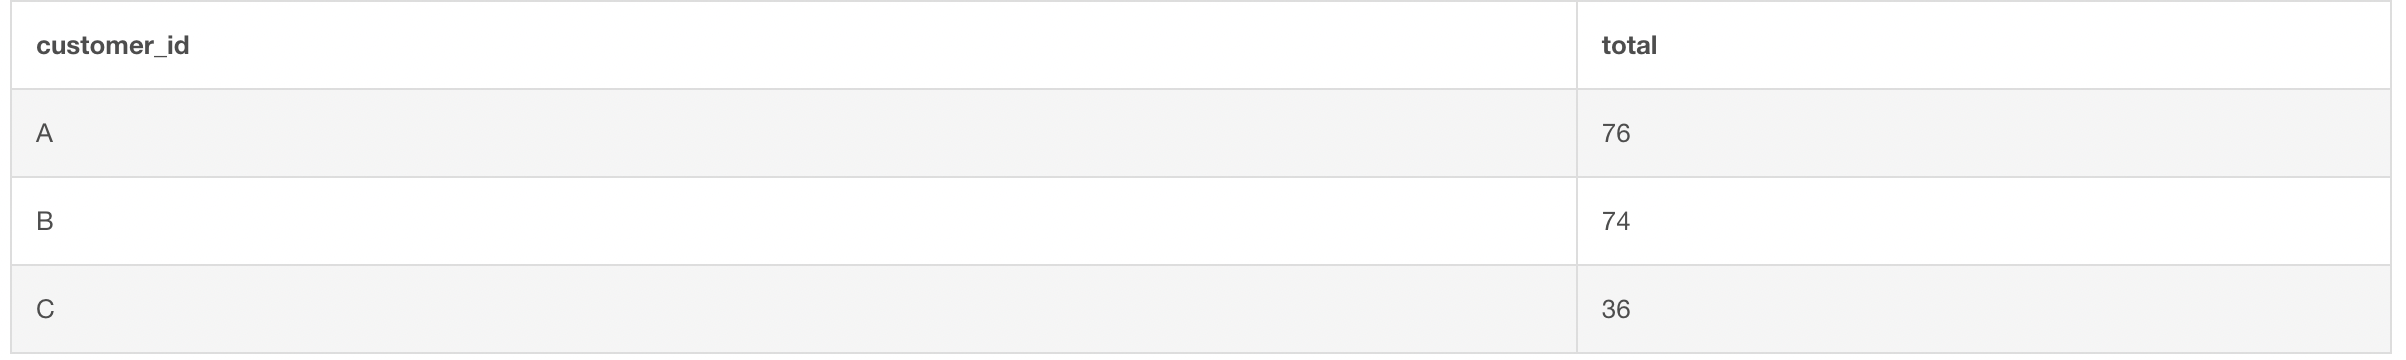

# 2. How many days has each customer visited the restaurant?

In [ ]:
SELECT customer_id ,
        count(distinct order_date) total_visits from dannys_diner.sales
group by 1
order by total_visits desc

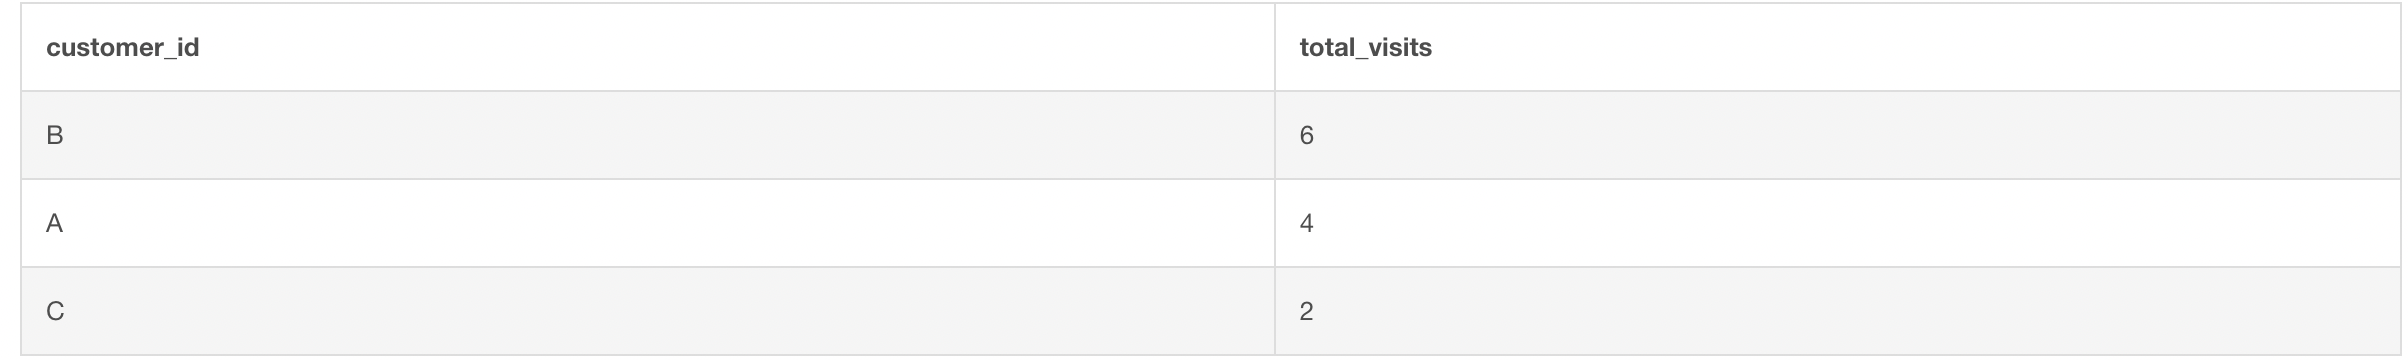

# 3. What was the first item from the menu purchased by each customer?

In [ ]:
Select T.customer_id, T.product_name from 
		(SELECT sales.customer_id,menu.product_name,
		RANK() OVER (PARTITION BY sales.customer_id order by sales.order_date) as first_order
		from dannys_diner.sales sales
        join dannys_diner.menu menu on 
         sales.product_id = menu.product_id
		)as T
     where T.first_order = 1
     group by customer_id, product_name

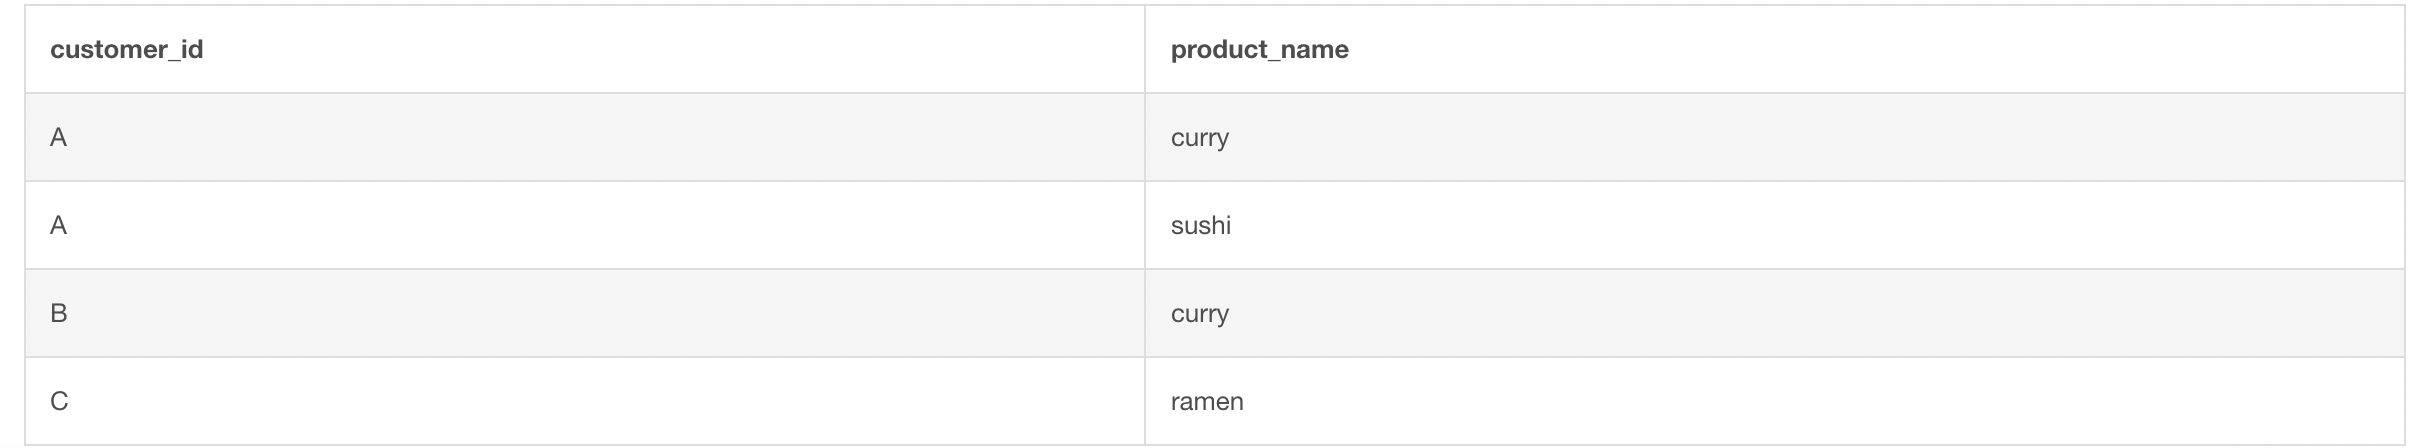

# 4. What is the most purchased item on the menu and how many times was it purchased by all customers?

In [ ]:
Select menu.product_name , count(sales.product_id) as total_purchased 
       from dannys_diner.sales sales
       left join dannys_diner.menu menu 
       on sales.product_id = menu.product_id
group by menu.product_name
order by total_purchased desc
limit 1



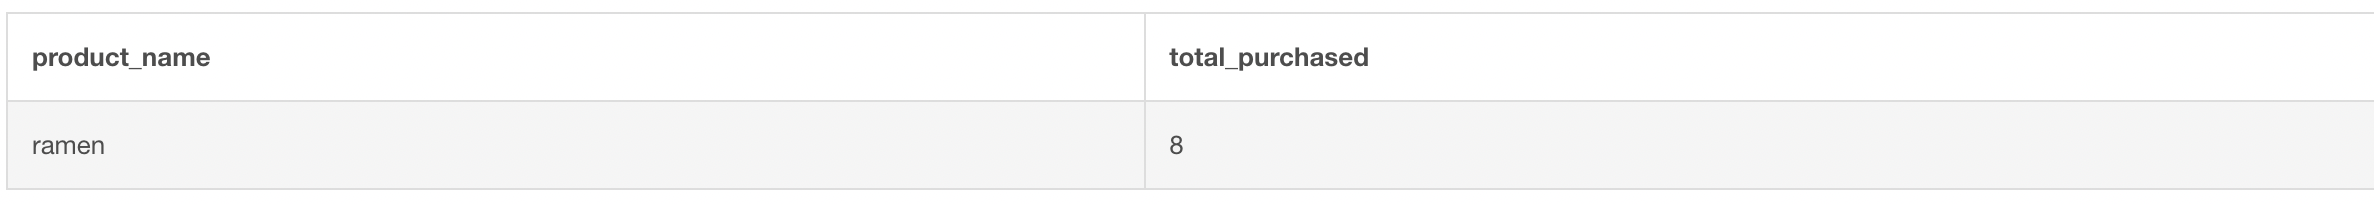

# 5. Which item was the most popular for each customer?

In [ ]:
With ranked as (
  Select a.customer_id,b.product_name, rank() over 
  (partition by a.customer_id order by count(a.product_id) desc) as popular 
  from dannys_diner.sales a 
  left join dannys_diner.menu b on a.product_id = b.product_id
	group by 1,2)

select customer_id, product_name from ranked where popular = 1 

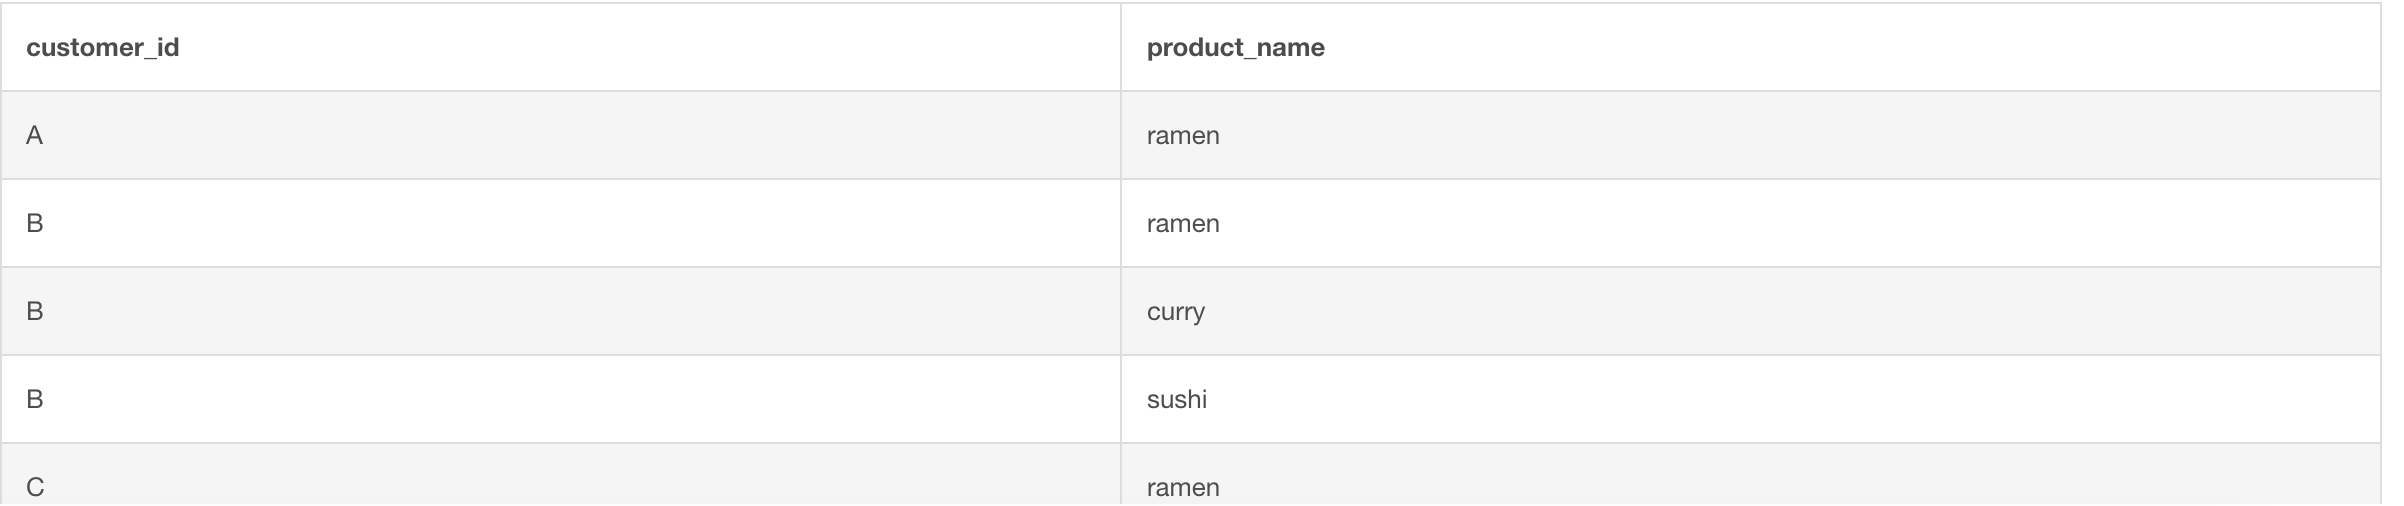

# 6. Which item was purchased first by the customer after they became a member?

In [ ]:

with ranked as (Select a.customer_id,a.order_date, c.product_name, 
        rank() over (partition by a.customer_id order by order_date) as first_order
		from dannys_diner.sales a 
        left join dannys_diner.members b 
		on a.customer_id=b.customer_id
        left join dannys_diner.menu c
        on a.product_id = c.product_id
		where a.order_date >= b.join_date)
        
select customer_id,order_date,product_name from ranked
where first_order = 1

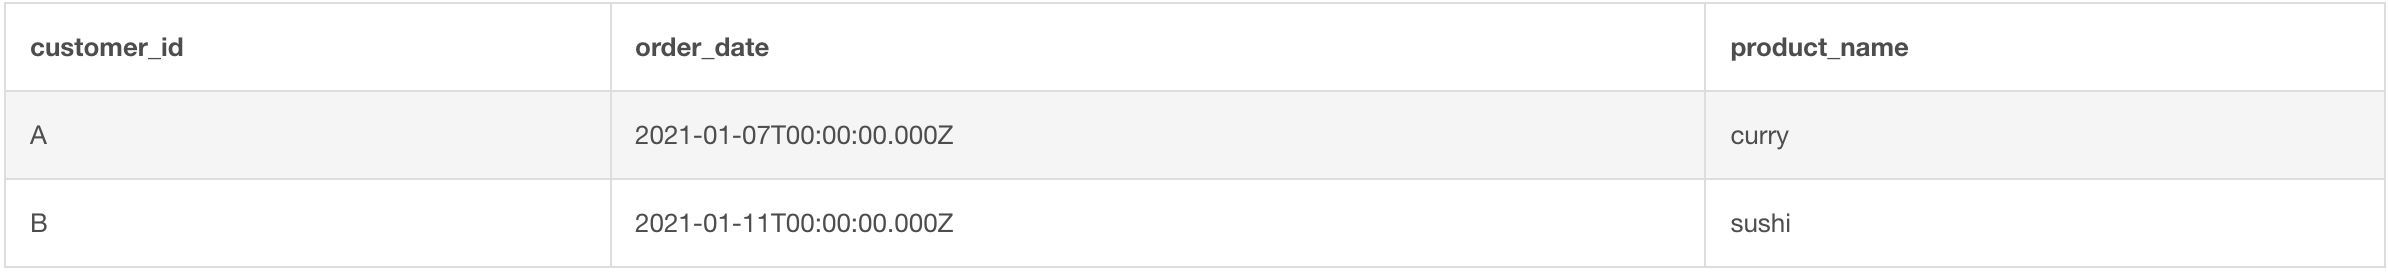

# 7. Which item was purchased just before the customer became a member?

In [ ]:
SELECT customer_id,order_date,product_name from (Select a.customer_id,c.product_name,a.order_date,
		Rank() over( partition by a.customer_id order by a.order_date desc) as ranked 
        from dannys_diner.sales a 
		left join dannys_diner.members b on a.customer_id =b.customer_id
        left join dannys_diner.menu c on a.product_id = c.product_id
		Where a.order_date::date < b.join_date::date) T
where T.ranked = 1

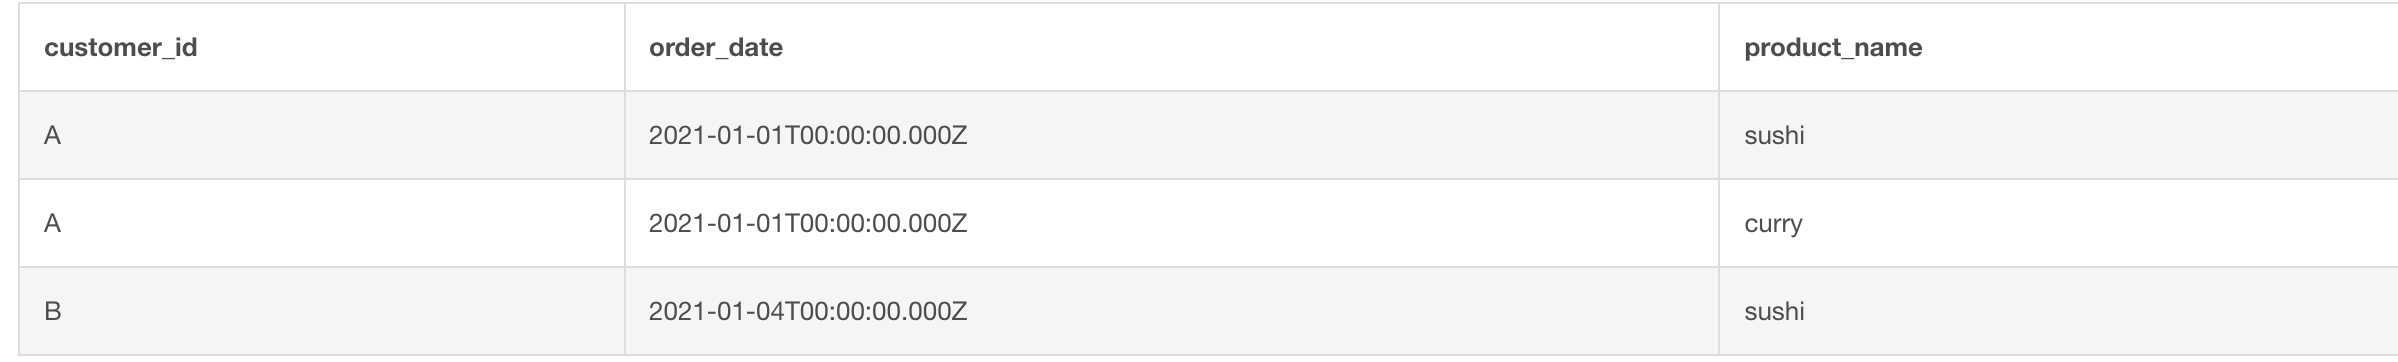

# 8. What is the total items and amount spent for each member before they became a member?

In [ ]:
Select a.customer_id,count(distinct a.product_id) as total_prod, sum(c.price) as price
        from dannys_diner.sales a 
		left join dannys_diner.members b on a.customer_id =b.customer_id
        left join dannys_diner.menu c on a.product_id = c.product_id
Where a.order_date::date < b.join_date::date
group by a.customer_id

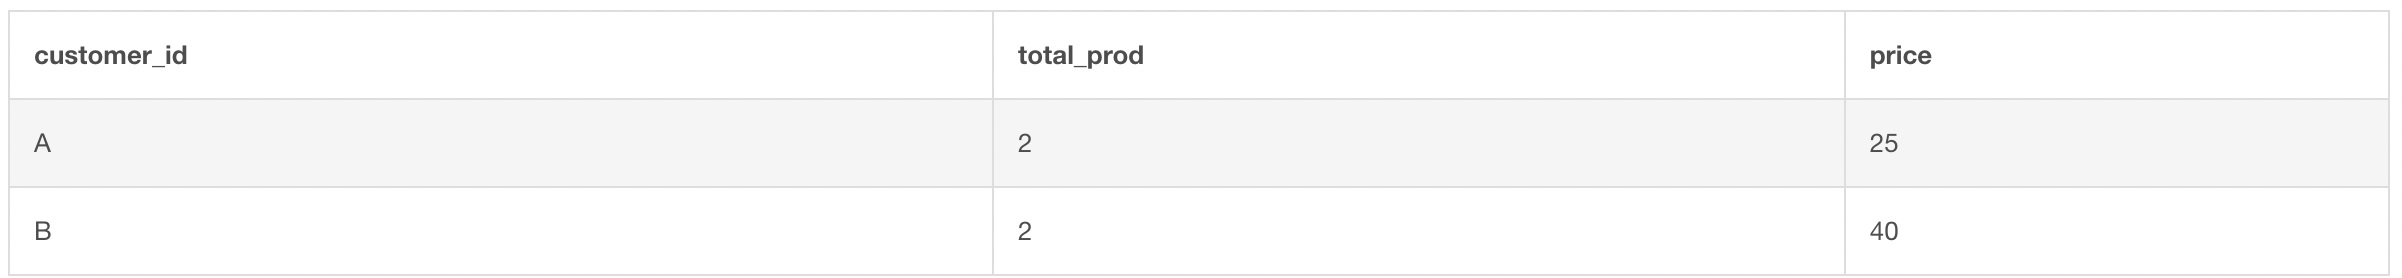

# 9.  If each $1 spent equates to 10 points and sushi has a 2x points multiplier - how many points would each customer have?

In [ ]:
Select a.customer_id,sum(Case when a.product_id = 1 then b.price*20 
                            else b.price*10 end) as points
       from dannys_diner.sales a 
       left join dannys_diner.menu b on a.product_id = b.product_id
group by a.customer_id
order by 1 

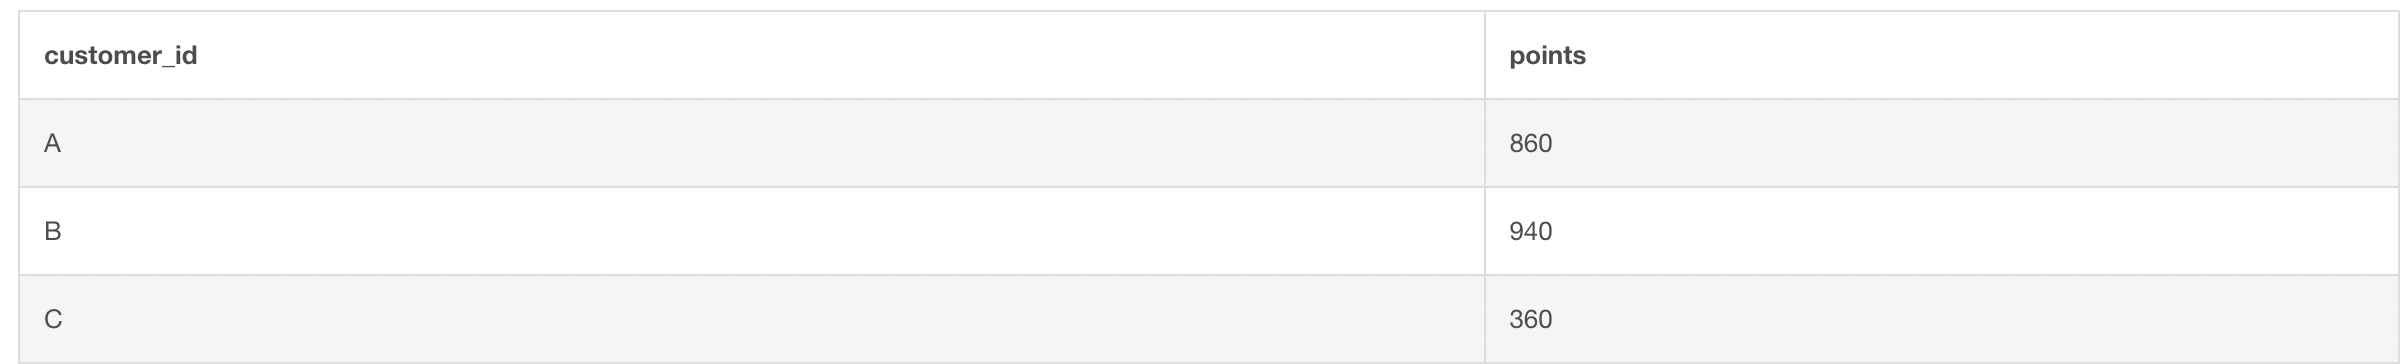

# 10. In the first week after a customer joins the program (including their join date) they earn 2x points on all items, not just sushi - how many points do customer A and B have at the end of January


In [ ]:
SELECT a.customer_id, 
            sum(case when a.product_id = 1 then c.price*20
                     when a.order_date between b.join_date and b.join_date::date + 6 then c.price*20 
                     else c.price*10 end) as price
    from dannys_diner.sales a
    join dannys_diner.members b on a.customer_id = b.customer_id
    left join dannys_diner.menu c on a.product_id = c.product_id
where a.order_date < '2021-01-31'
group by 1

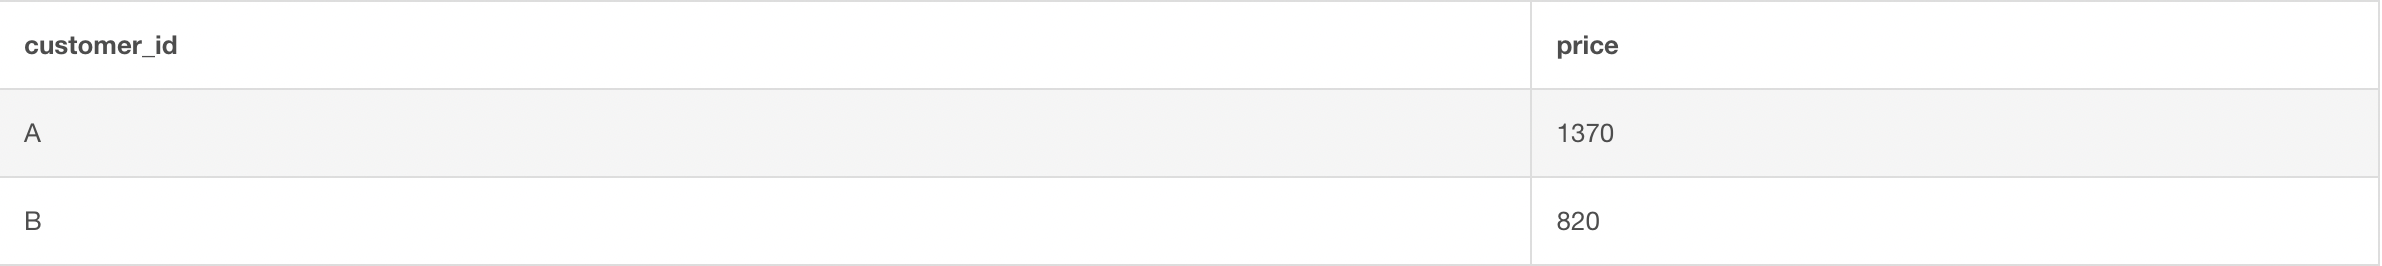